## Functions

In [194]:
%matplotlib inline
def clean_up(data):
    data = data.rename(columns=lambda x: x.strip())             # strip the spaces in the headers
    
    data.loc[data['Gender'] == 'F', 'Gender'] = 0         # these values are stored as ints
    data.loc[data['Gender'] == 'M', 'Gender'] = 1

    data.loc[data['Location'] == 'U', 'Location'] = 0
    data.loc[data['Location'] == 'R', 'Location'] = 1

    data.loc[data['famsize'] == 'LE3', 'famsize'] = 0
    data.loc[data['famsize'] == 'GT3', 'famsize'] = 1

    data.loc[data['Pstatus'] == 'A', 'Pstatus'] = 0
    data.loc[data['Pstatus'] == 'T', 'Pstatus'] = 1

    data.loc[data['Pstatus'] == 'A', 'Pstatus'] = 0

    data.loc[data['schoolsup'] == 'no', 'schoolsup'] = 0
    data.loc[data['schoolsup'] == 'yes', 'schoolsup'] = 1

    data.loc[data['famsup'] == 'no', 'famsup'] = 0
    data.loc[data['famsup'] == 'yes', 'famsup'] = 1

    data.loc[data['paid'] == 'no', 'paid'] = 0
    data.loc[data['paid'] == 'yes', 'paid'] = 1

    data.loc[data['activities'] == 'no', 'activities'] = 0
    data.loc[data['activities'] == 'yes', 'activities'] = 1

    data.loc[data['nursery'] == 'no', 'nursery'] = 0
    data.loc[data['nursery'] == 'yes', 'nursery'] = 1

    data.loc[data['higher'] == 'no', 'higher'] = 0
    data.loc[data['higher'] == 'yes', 'higher'] = 1

    data.loc[data['internet'] == 'no', 'internet'] = 0
    data.loc[data['internet'] == 'yes', 'internet'] = 1
    
    SN = data['S/N']

    data = data.drop(['S/N'], axis=1)
    
    return data, SN

## Data Cleanup and Exploration

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
data = pd.read_csv('Train.csv', encoding='utf8', delimiter=',', delim_whitespace=False)

In [197]:
data.head()

,S/N,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Scores
0,AB1,F,13,U,GT3,A,4,4,2,2,...,no,no,yes,yes,no,4,3,3,6,17
1,AB2,F,12,U,GT3,T,1,1,1,2,...,no,no,no,yes,yes,5,3,3,4,16
2,AB3,F,10,U,LE3,T,1,1,1,2,...,yes,no,yes,yes,yes,4,3,3,10,25
3,AB4,F,10,U,GT3,T,4,2,1,3,...,yes,yes,yes,yes,yes,3,2,5,2,44
4,AB5,F,11,U,GT3,T,3,3,1,2,...,yes,no,yes,yes,no,4,3,5,4,26


Now we need to transform the data to numerical variables from categorical variables

In [198]:
data, SN= clean_up(data)

In [199]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


## Model Evaluation

In [200]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

train_data, cv_data = train_test_split(data, test_size=0.3, random_state=42)

train_y = train_data['Scores']
cv_y = cv_data['Scores']

train_X = train_data.drop(['Scores'], axis=1)
cv_X = cv_data.drop(['Scores'], axis=1)

In [201]:
alphas = [0, 0.1, 0.3, 1, 3, 10, 20, 30, 50, 100, 150]
J_cv = []
J_train = []

for alp in alphas:

    reg = linear_model.Ridge(alpha = alp)
    reg.fit(train_X, train_y)

    cv_preds = reg.predict(cv_X)
    train_preds = reg.predict(train_X)

    m_train = len(train_y)
    m_cv = len(cv_y)

    J_cv.append(mean_squared_error(cv_preds, cv_y.values))
    J_train.append(mean_squared_error(train_preds, train_y.values))

[140.16905805210095, 139.89024779027025, 139.36526249726649, 137.79239896444827, 134.5946051465973, 128.70132280128445, 124.71883484159613, 122.59374391556896, 120.58872323405903, 119.81156567643414, 120.57940801137224]


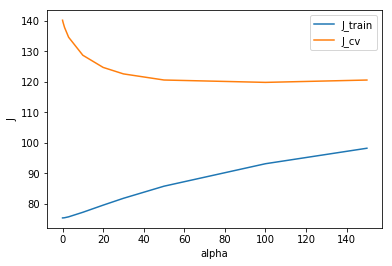

In [202]:
plt.plot(alphas, J_train, label='J_train')
plt.plot(alphas, J_cv, label='J_cv')
plt.xlabel('alpha')
plt.ylabel('J')
plt.legend()

print(J_cv)

## Submission

In [203]:
submission_data = pd.read_csv('Test.csv', encoding='utf8', delimiter=',', delim_whitespace=False)
submission_data, SN = clean_up(submission_data)
submission_data = submission_data.drop('reason', axis=1)
submission_data.head()

,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,famsup,paid,activities,nursery,higher,internet,famrel,freetime,health,absences
0,0,11,0,1,1,4,3,1,2,0,...,1,0,1,1,1,1,4,3,2,2
1,0,11,0,1,1,2,3,1,2,0,...,1,1,1,1,1,0,4,4,4,6
2,0,12,0,1,1,1,1,1,2,0,...,1,1,0,0,1,0,4,4,1,4
3,0,12,1,1,1,2,2,1,1,0,...,1,0,0,1,1,1,5,3,3,18
4,0,11,1,1,1,2,2,2,4,0,...,1,1,1,0,1,1,5,3,5,6


In [207]:
reg_submit = reg = linear_model.Ridge(alpha = 20)
reg.fit(train_X, train_y)

submissions=reg.predict(submission_data)

In [208]:
d = {'S/N': SN, 'Scores': pd.Series(submissions)}

In [209]:
submission_df = pd.DataFrame(d)
submission_df.to_csv('Submission.csv', index=False)